In [3]:
from more_itertools import sliced
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
data = pd.read_csv('../ProjectML/US_Accidents_Dec19.csv')

In [5]:
text_data = data[['Description','Severity']].sample(n=1000, random_state=10)
text_data.head()

,Description,Severity
2355736,At I-280/OH-420/Exit 71 - Accident.,2
1755961,Accident on I-476 Southbound from Exit 44 to E...,3
1695530,Right hand shoulder blocked due to accident on...,3
1608215,Accident on Memorial Hwy at Independence Pkwy.,2
1774276,Accident on I-805 Southbound at Exit 21 CA-274...,3


In [6]:
for i in range(15):
    print(text_data['Description'].iloc[i])

At I-280/OH-420/Exit 71 - Accident.
Accident on I-476 Southbound from Exit 44 to Exits 31 31A 31B PA-63 Sumneytown Pike.
Right hand shoulder blocked due to accident on I-295 Southbound before Exit 51 US-90 Beach Blvd.
Accident on Memorial Hwy at Independence Pkwy.
Accident on I-805 Southbound at Exit 21 CA-274 Balboa Ave.
Accident on SC-215 Blackstock Rd at Cinder Ridge Dr.
At CR-613/Flanders Netcong Rd - Accident.
Accident on Penn Ave at I-240 Service Rd.
Accident a motorcycle involved on Haverhill St at Rustic Ln.
Accident on Greenbriar Rd at Southwest Pkwy.
Accident on I-264 Eastbound at Exits 11 12 I-65.
At I-80/Exit 304 - Accident.
Restrictions due to accident and fallen power cables on 76th St at Parkview Blvd.
Accident on I-77 Southbound at Brookshire Fwy.
Multi-vehicle accident on I-90 Westbound at Exit 188 I-271.


In [7]:
MAX_NB_WORDS = 100
MAX_SEQUENCE_LENGTH = 500
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(text_data['Description'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 1822 unique tokens.


In [8]:
X = tokenizer.texts_to_sequences(text_data['Description'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
Y = pd.get_dummies(text_data['Severity']).values
print('Shape of label tensor:', Y.shape)

Shape of data tensor: (1000, 500)
Shape of label tensor: (1000, 3)


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(900, 500) (900, 3)
(100, 500) (100, 3)


In [35]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
batch_size = 64
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=4, min_delta=0.001)])

C:\Users\rishi\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 810 samples, validate on 90 samples
Epoch 1/15
810/810 [==============================] - 8s 9ms/step - loss: 0.9159 - accuracy: 0.6259 - val_loss: 0.9401 - val_accuracy: 0.6000
Epoch 2/15
810/810 [==============================] - 6s 8ms/step - loss: 0.7075 - accuracy: 0.6963 - val_loss: 0.7871 - val_accuracy: 0.6000
Epoch 3/15
810/810 [==============================] - 7s 9ms/step - loss: 0.6213 - accuracy: 0.7074 - val_loss: 0.6522 - val_accuracy: 0.8000
Epoch 4/15
810/810 [==============================] - 7s 9ms/step - loss: 0.4971 - accuracy: 0.7988 - val_loss: 0.5703 - val_accuracy: 0.7667
Epoch 5/15
810/810 [==============================] - 7s 9ms/step - loss: 0.4026 - accuracy: 0.8531 - val_loss: 0.4617 - val_accuracy: 0.8556
Epoch 6/15
810/810 [==============================] - 7s 9ms/step - loss: 0.3328 - accuracy: 0.8827 - val_loss: 0.3948 - val_accuracy: 0.9222
Epoch 7/15
810/810 [==============================] - 8s 9ms/step - loss: 0.3261 - accuracy: 0.8951 - v

In [36]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

100/100 [==============================] - 0s 2ms/step
Test set
  Loss: 0.249
  Accuracy: 0.910


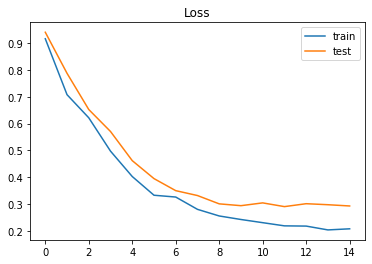

In [37]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();